# House Price Prediction Using ML

This notebook uses ml algorithms provided by scikit-learn library of python to predict the price of house through end-to-end ml pipeline.

## 1. Problem
The Problem here is to predict the price of house by finding the patterns in the features provided by the dataset.

## 2. Data
The Datasets has been taken from the Kaggle Competitions https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

* train.csv - the training set
* test.csv - the test set
* data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
* sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

## 3. Evaluation
The evaluation matrix in this competition is evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

Link to more info: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation

## 4. Feature
Here's a brief version of what you'll find in the data description file.

* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

#### Exploratory Data Analysis

In [134]:
# Importing important libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [135]:
# Setting to display all the columns 
pd.pandas.set_option('display.max_columns', None)

In [136]:
# Importing the dataset 
df = pd.read_csv("datasets/train.csv")

df.shape

(1460, 81)

In [137]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [138]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [139]:
# Checking the features having the missing values 
feature_with_na = [feature for feature in df.columns if df[feature].isna().sum()>0]
for feature in feature_with_na:
    print(f"{feature} having {df[feature].isna().sum()} missing values, i.e, {np.round(df[feature].isna().sum()/(df[feature].count() + df[feature].isna().sum()) * 100, 4)}% missing values")

LotFrontage having 259 missing values, i.e, 17.7397% missing values
Alley having 1369 missing values, i.e, 93.7671% missing values
MasVnrType having 8 missing values, i.e, 0.5479% missing values
MasVnrArea having 8 missing values, i.e, 0.5479% missing values
BsmtQual having 37 missing values, i.e, 2.5342% missing values
BsmtCond having 37 missing values, i.e, 2.5342% missing values
BsmtExposure having 38 missing values, i.e, 2.6027% missing values
BsmtFinType1 having 37 missing values, i.e, 2.5342% missing values
BsmtFinType2 having 38 missing values, i.e, 2.6027% missing values
Electrical having 1 missing values, i.e, 0.0685% missing values
FireplaceQu having 690 missing values, i.e, 47.2603% missing values
GarageType having 81 missing values, i.e, 5.5479% missing values
GarageYrBlt having 81 missing values, i.e, 5.5479% missing values
GarageFinish having 81 missing values, i.e, 5.5479% missing values
GarageQual having 81 missing values, i.e, 5.5479% missing values
GarageCond having 8

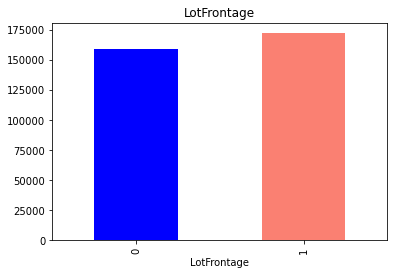

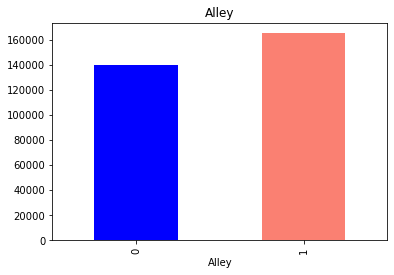

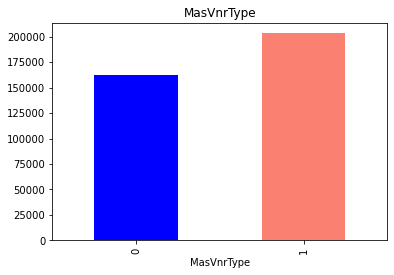

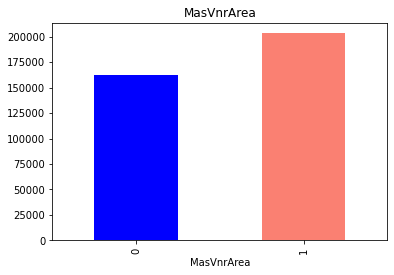

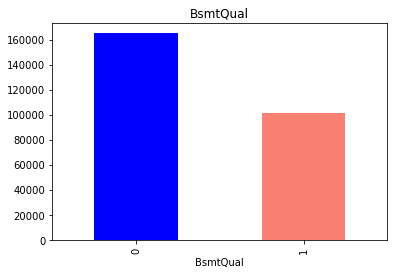

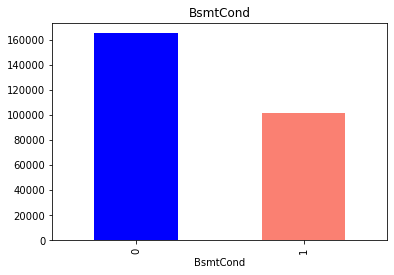

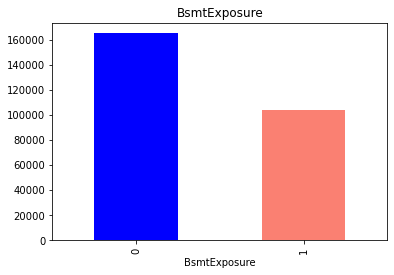

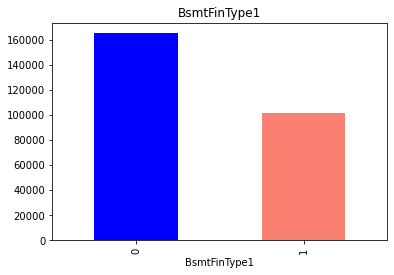

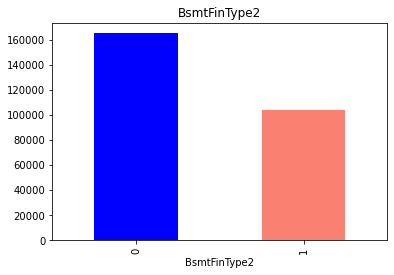

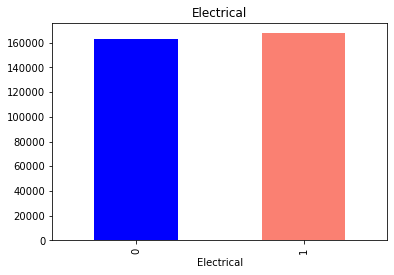

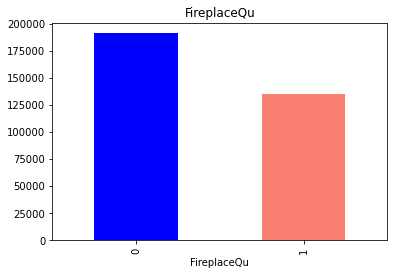

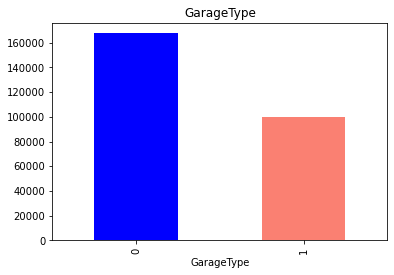

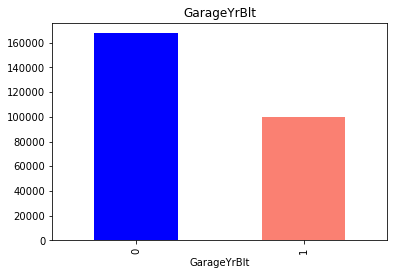

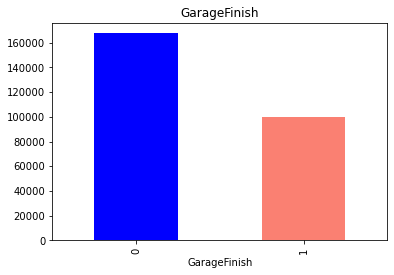

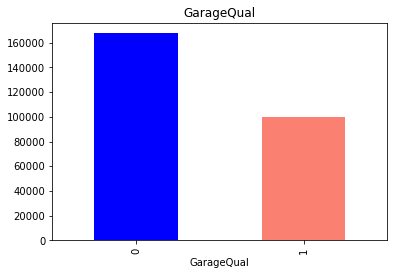

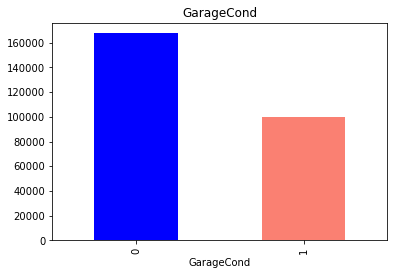

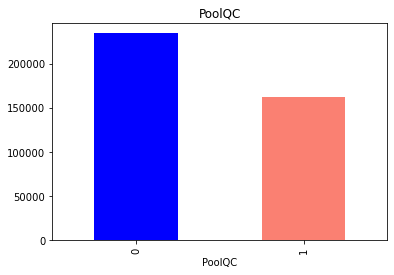

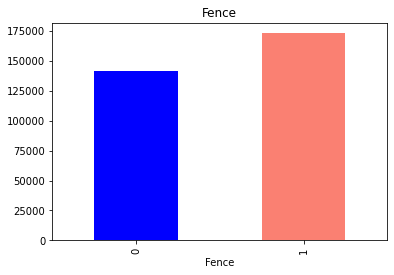

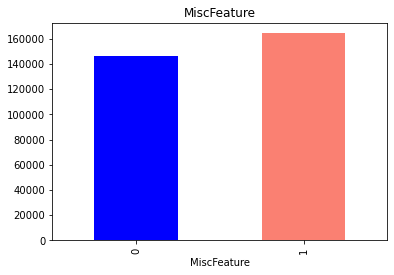

In [140]:
# Finding the relationship between missing values and Sales Price 
for feature in feature_with_na:
    # Copying the main dataframe
    data = df.copy()
    
    # Variable that indicates 1 if the value is missing and 0 otherwise
    data[feature] = np.where(data[feature].isna(), 1, 0)
    
    # Ploting the graph with median of salesprice in missing and non-missing values
    data.groupby(feature)["SalePrice"].median().plot.bar(color=["blue", "salmon"])
    plt.title(feature)
    plt.show();

### Numerical Features

In [141]:
# Finding the numerical features for analysis 
numerical_features = [feature for feature in data.columns if df[feature].dtypes != "O"]
print(f"Total Numerical Featrues are {len(numerical_features)}")

df[numerical_features].head()

Total Numerical Featrues are 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


#### Temporal Features

In [142]:
# Finding the DateTime Features
datetime_features = [feature for feature in df.columns if "Yr" in feature or "Year" in feature]
datetime_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

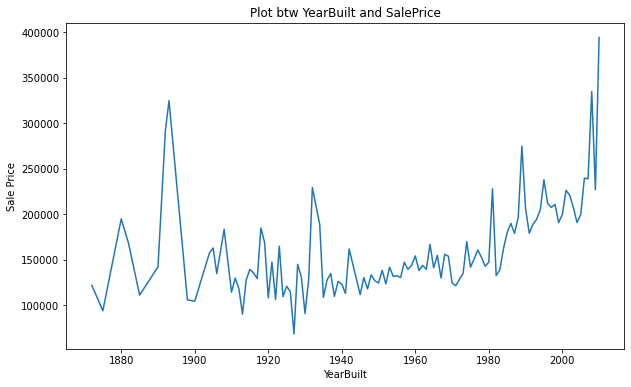

In [143]:
# Relationship between YearBuilt and SalePrice
plt.figure(figsize=(10,6))
df.groupby('YearBuilt')["SalePrice"].median().plot()
plt.xlabel("YearBuilt")
plt.ylabel("Sale Price")
plt.title("Plot btw YearBuilt and SalePrice");

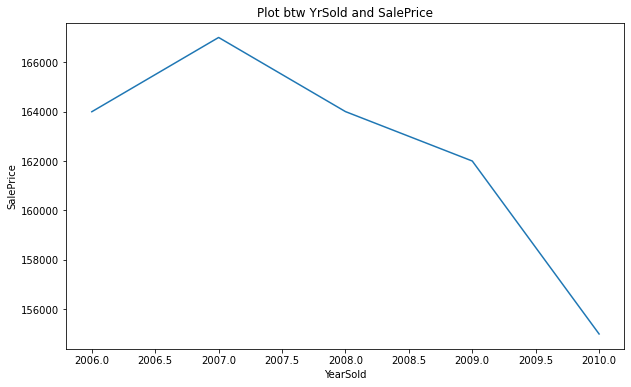

In [144]:
# Relationship between YrSold and SalePrice
plt.figure(figsize=(10,6))
df.groupby('YrSold')["SalePrice"].median().plot()
plt.xlabel("YearSold")
plt.ylabel("SalePrice")
plt.title("Plot btw YrSold and SalePrice");

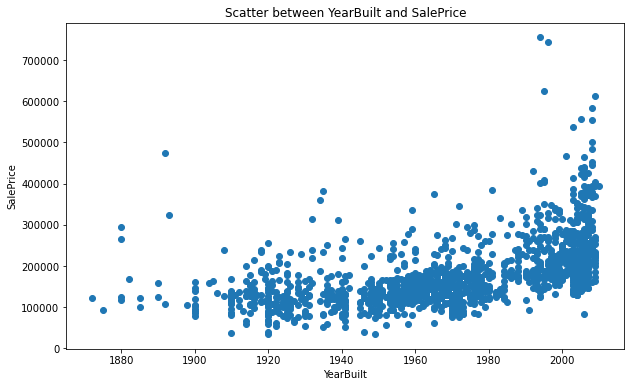

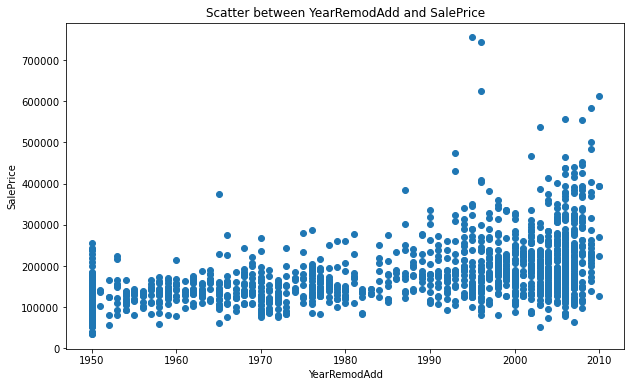

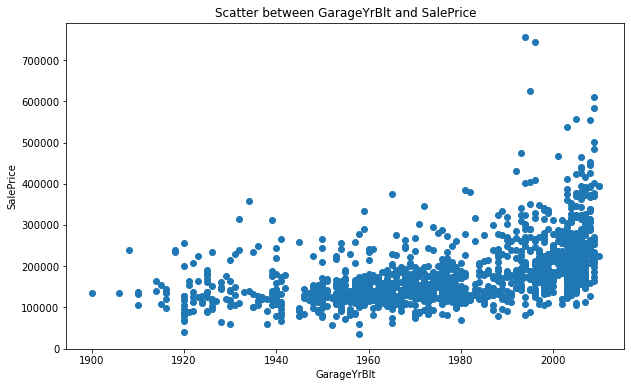

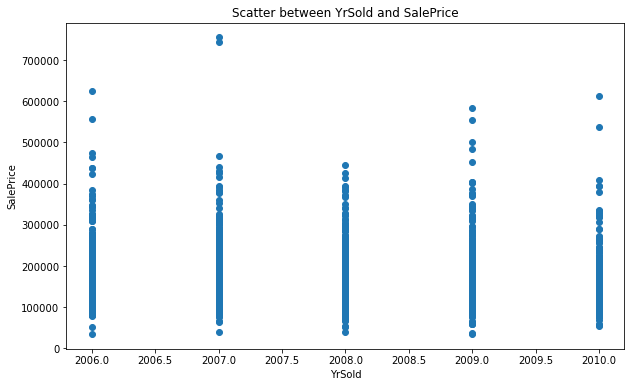

In [145]:
# Finding relation using scatter plot between temporal features and SalePrice

for feature in datetime_features:
    plt.figure(figsize=(10,6))
    plt.scatter(df[feature], df["SalePrice"])
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.title(f"Scatter between {feature} and SalePrice")

Scatters shows that all datetime features other than YrSold are having increase in price with increase in years. In simple terms new house has more price than older.

### Discreate Numerical Features

In [146]:
# Getting the discreate numerical features
discreate_features = [feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in datetime_features+["Id"]]
discreate_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [147]:
df[discreate_features].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


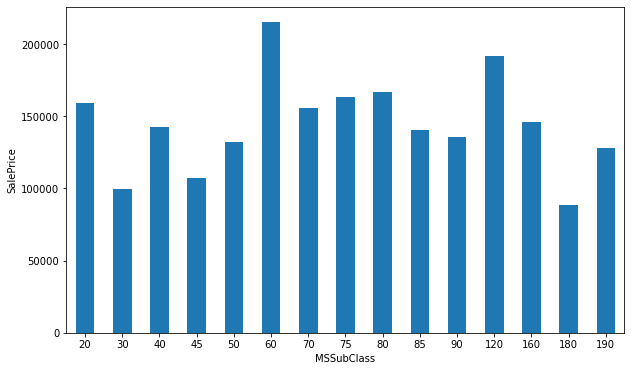

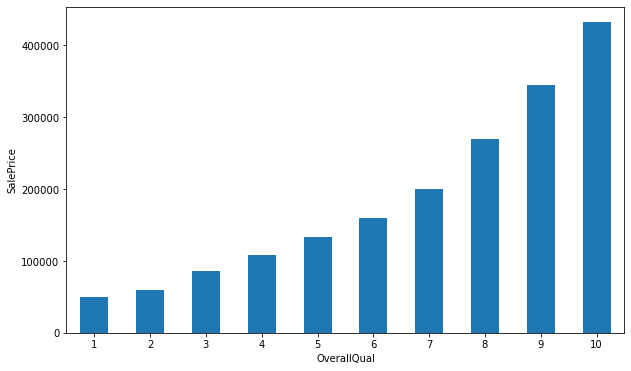

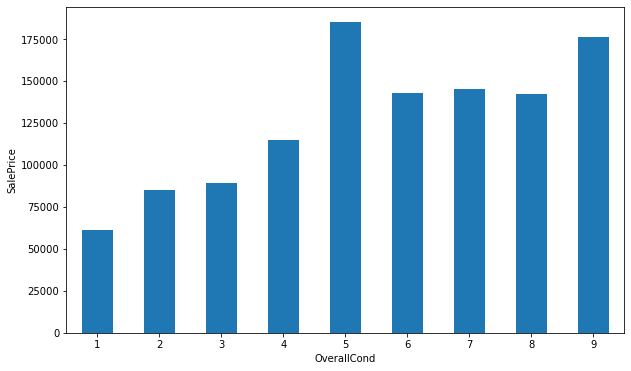

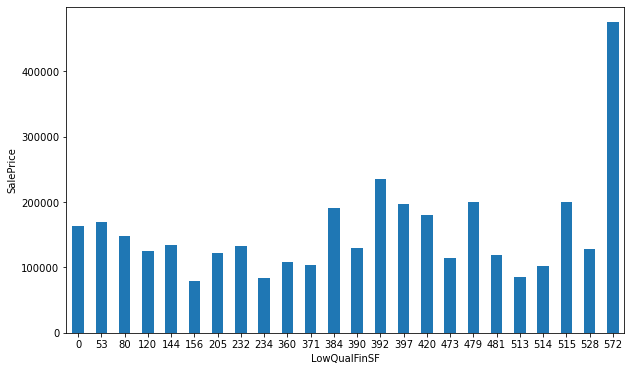

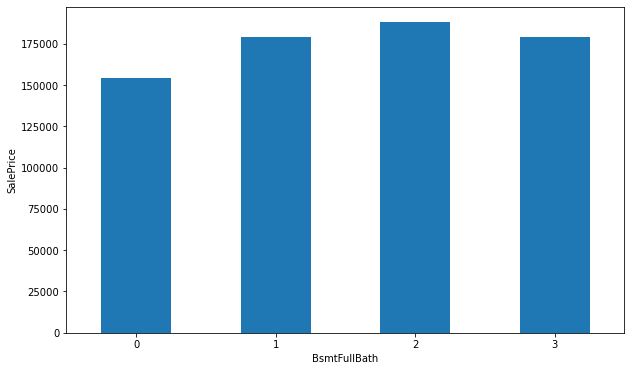

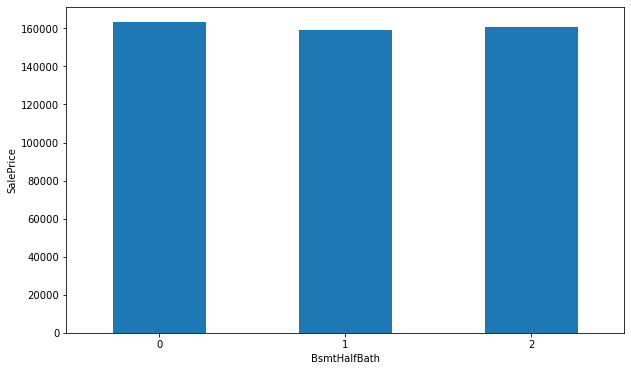

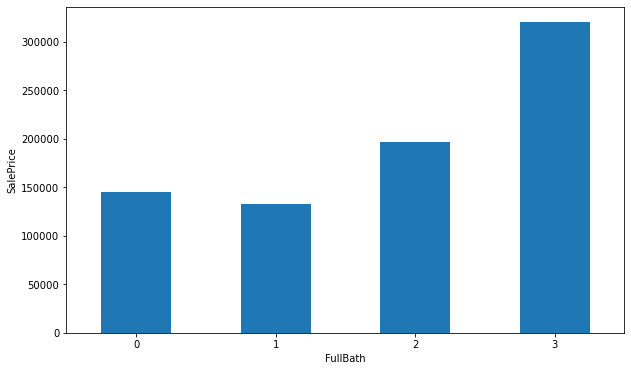

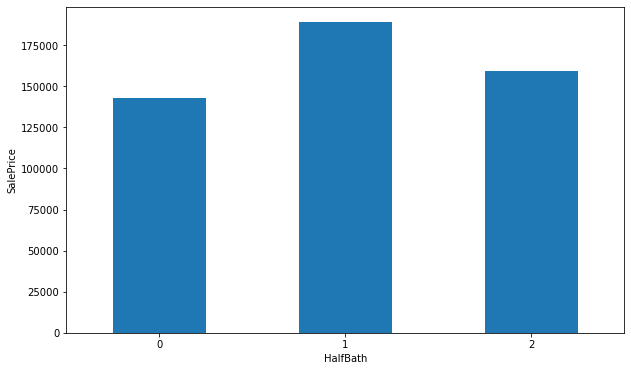

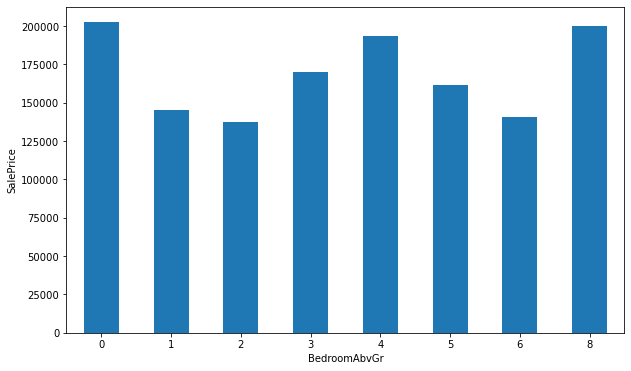

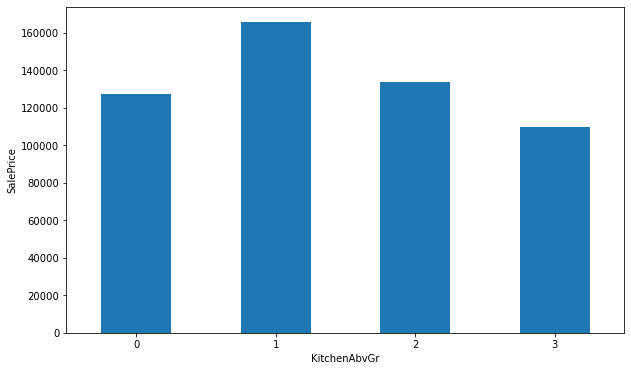

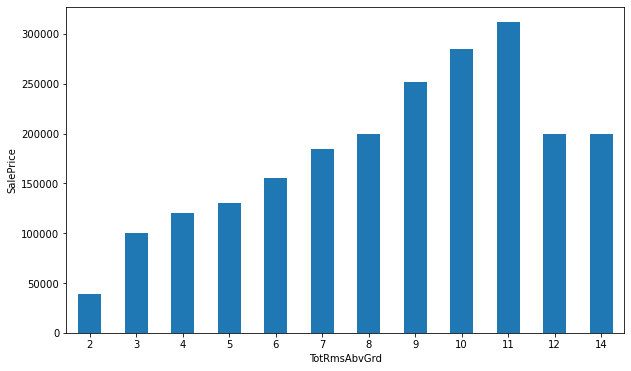

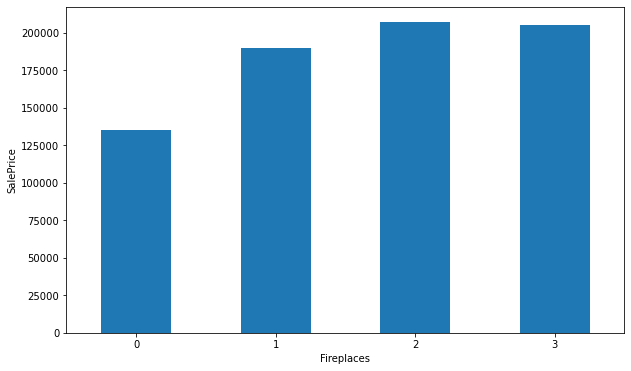

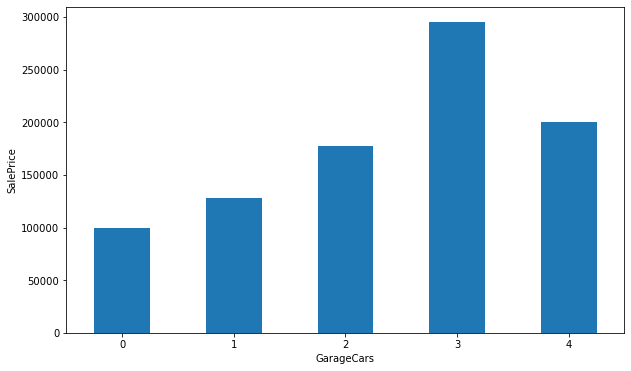

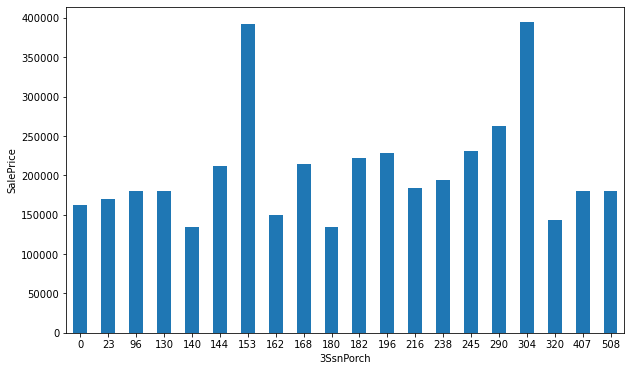

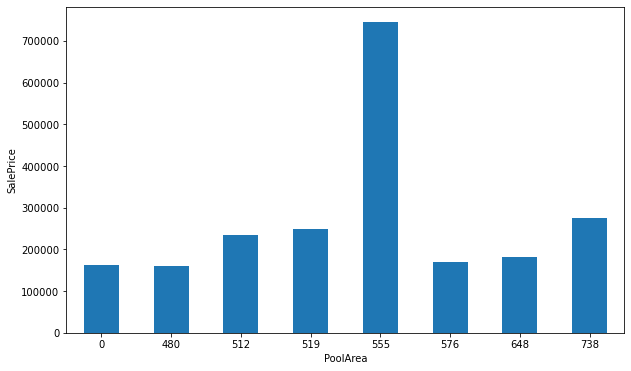

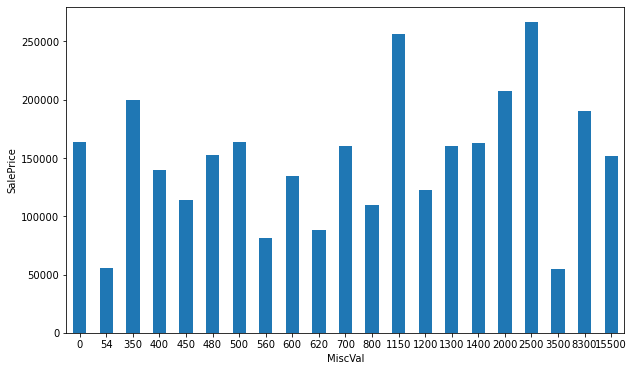

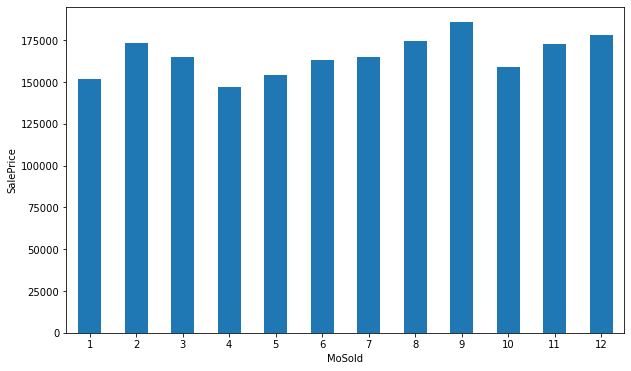

In [148]:
# Plot of relationship between discreate features and SalePrice
for feature in discreate_features:
    plt.figure(figsize=(10, 6))
    data = df.copy()
    data.groupby(feature)["SalePrice"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.xticks(rotation=0)
    plt.show();

### Continuous Numerical Features

In [149]:
# Getting the continuous numerical features
continuous_features = [feature for feature in numerical_features if feature not in datetime_features+discreate_features+["Id"]]
continuous_features

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

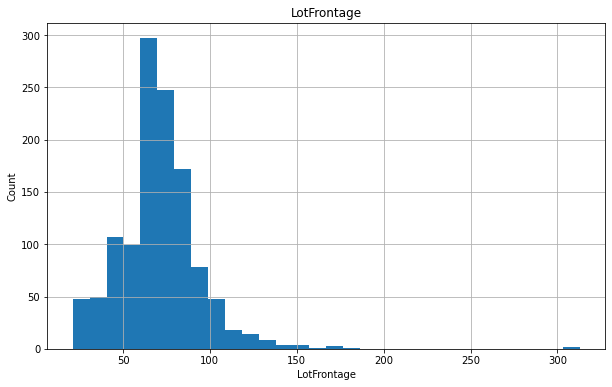

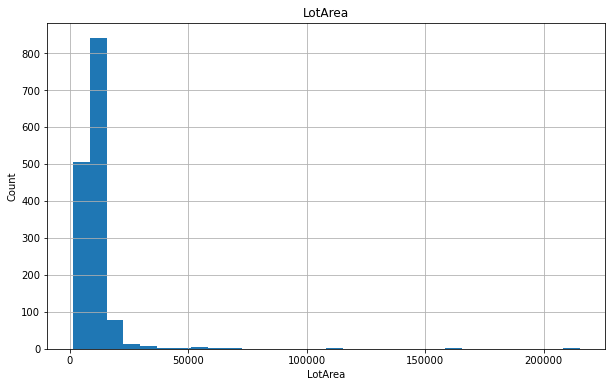

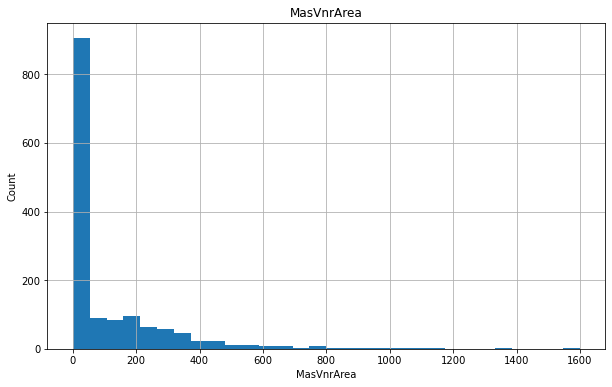

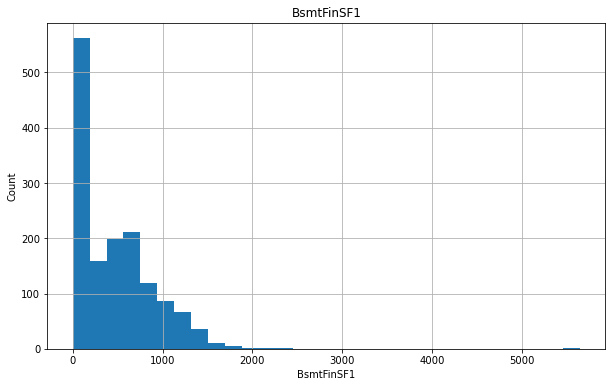

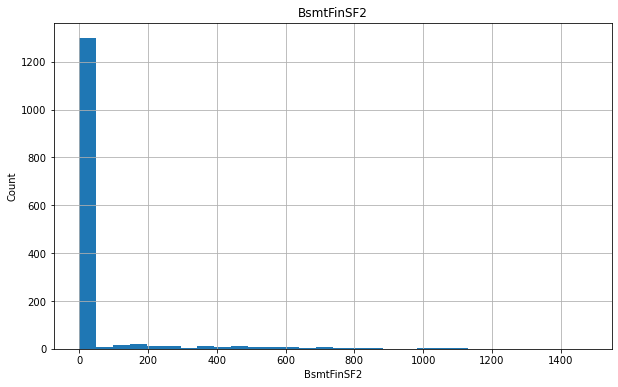

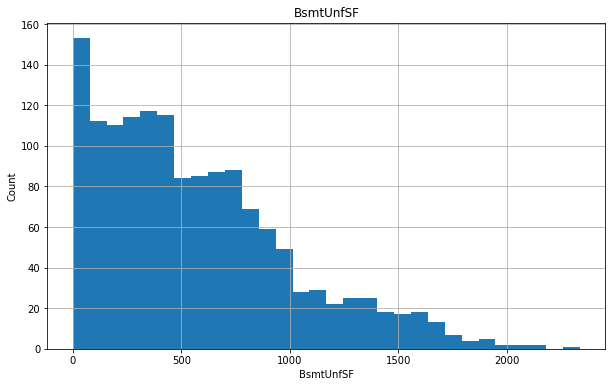

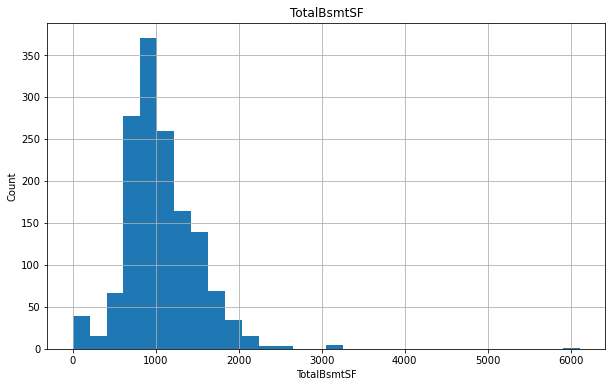

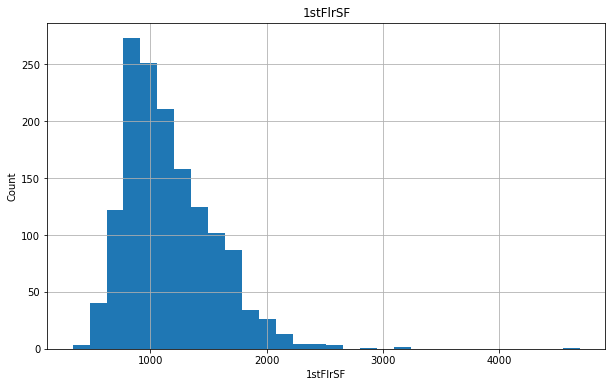

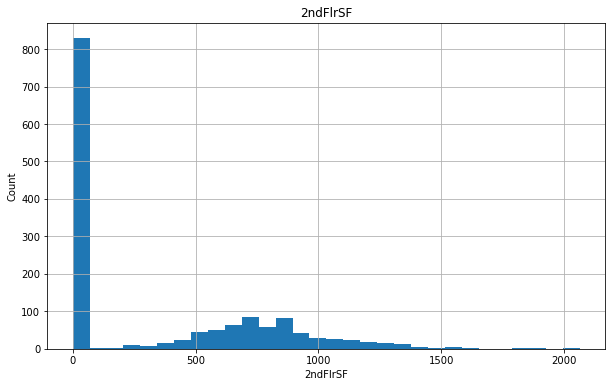

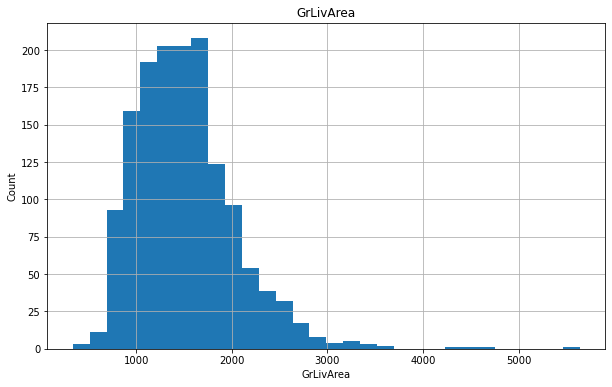

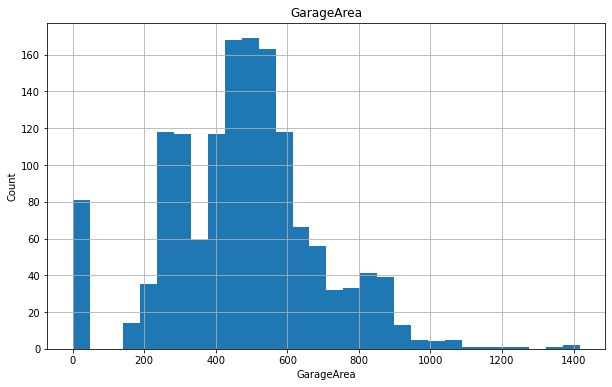

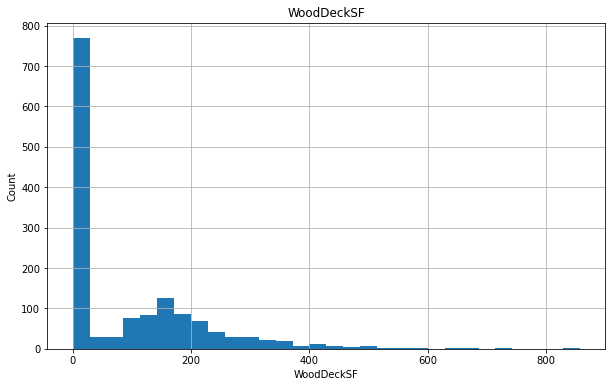

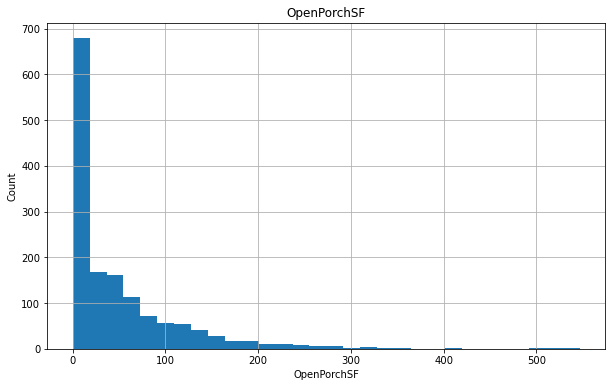

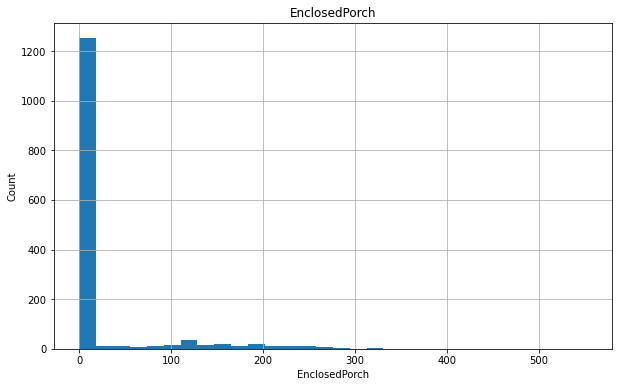

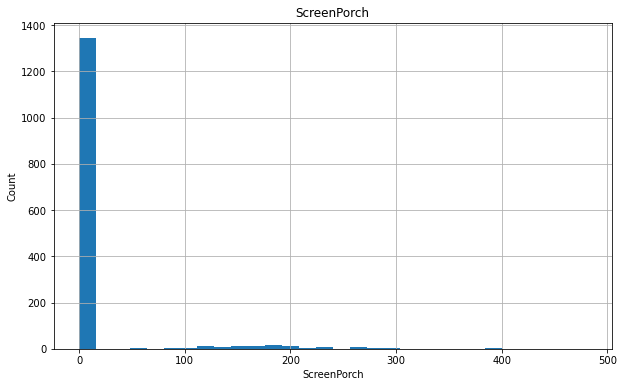

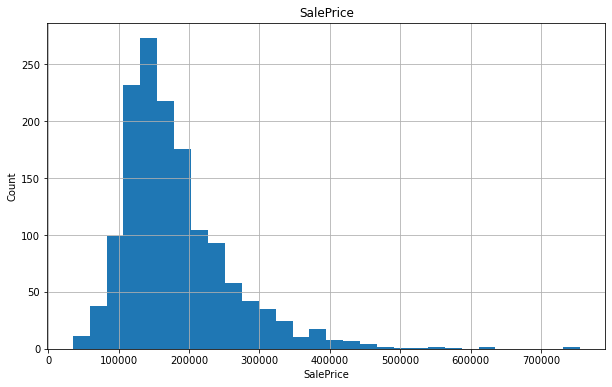

In [150]:
# Plotting the graphs between continuous numerical features and SalePrice
for feature in continuous_features:
    data = df.copy()
    plt.figure(figsize=(10,6))
    data[feature].hist(bins=30)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

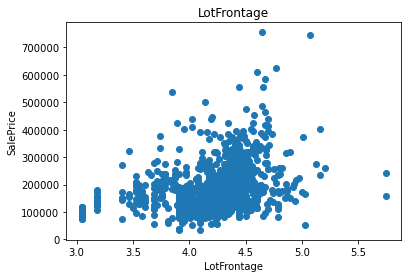

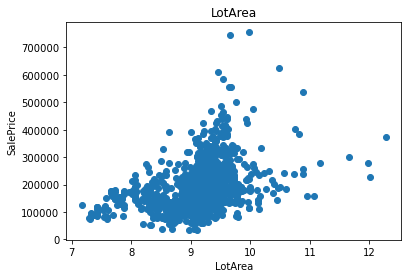

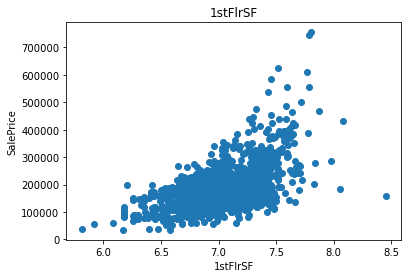

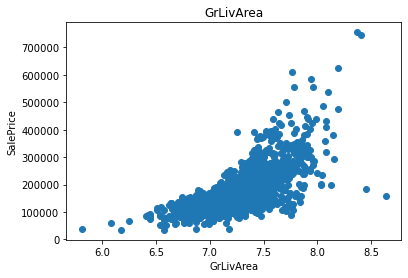

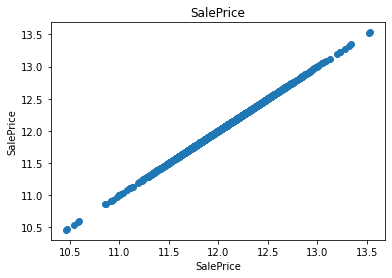

In [151]:
# Applying logarithic transfromation to these skewed data
for feature in continuous_features:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data["saleprice"] = np.log(data["SalePrice"])
        plt.scatter(data[feature], data["SalePrice"])
        plt.xlabel(feature)
        plt.ylabel("SalePrice")
        plt.title(feature)
        plt.show()

### Outliers

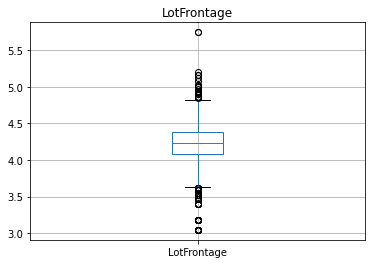

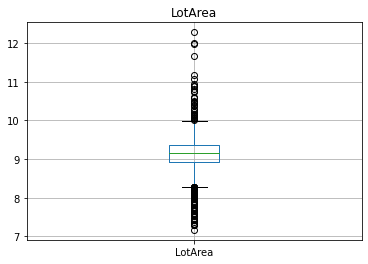

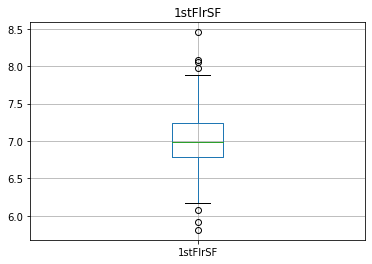

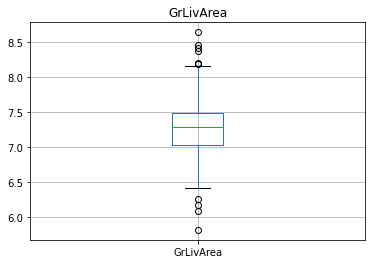

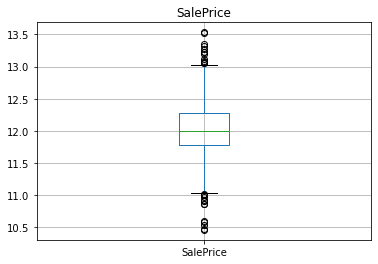

In [152]:
for feature in continuous_features:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(column=feature)
        plt.title(feature)
        plt.show()

### Categorical features

In [153]:
# Getting the categorical features
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [154]:
df[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [155]:
# finding the no. of categories in each feature
for feature in categorical_features:
    print(f"Feature {feature} has {len(df[feature].unique())} values")

Feature MSZoning has 5 values
Feature Street has 2 values
Feature Alley has 3 values
Feature LotShape has 4 values
Feature LandContour has 4 values
Feature Utilities has 2 values
Feature LotConfig has 5 values
Feature LandSlope has 3 values
Feature Neighborhood has 25 values
Feature Condition1 has 9 values
Feature Condition2 has 8 values
Feature BldgType has 5 values
Feature HouseStyle has 8 values
Feature RoofStyle has 6 values
Feature RoofMatl has 8 values
Feature Exterior1st has 15 values
Feature Exterior2nd has 16 values
Feature MasVnrType has 5 values
Feature ExterQual has 4 values
Feature ExterCond has 5 values
Feature Foundation has 6 values
Feature BsmtQual has 5 values
Feature BsmtCond has 5 values
Feature BsmtExposure has 5 values
Feature BsmtFinType1 has 7 values
Feature BsmtFinType2 has 7 values
Feature Heating has 6 values
Feature HeatingQC has 5 values
Feature CentralAir has 2 values
Feature Electrical has 6 values
Feature KitchenQual has 4 values
Feature Functional has 7

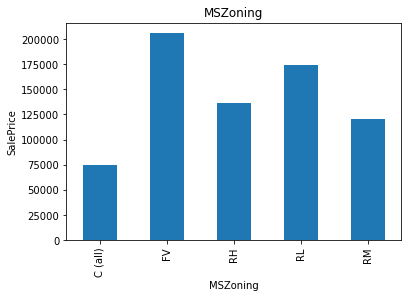

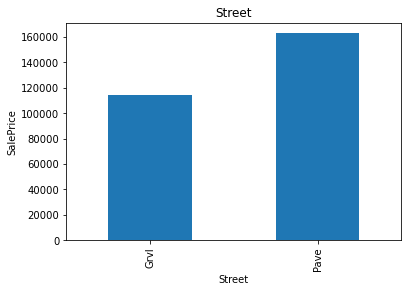

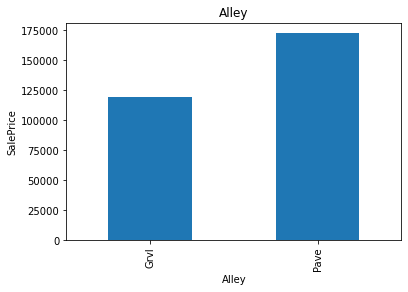

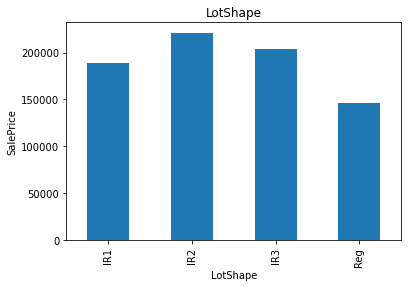

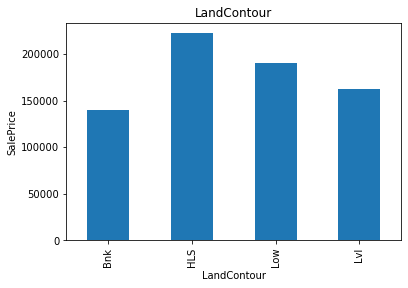

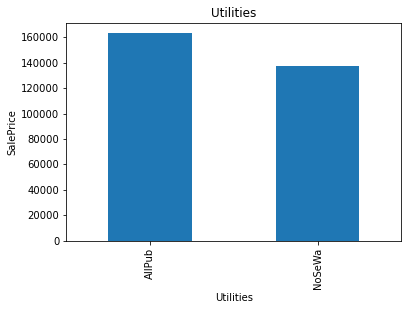

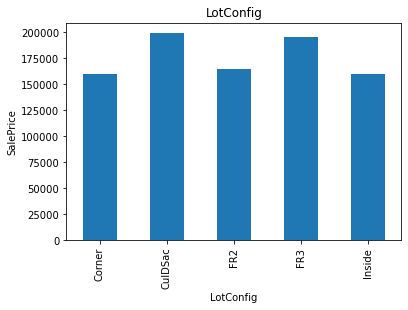

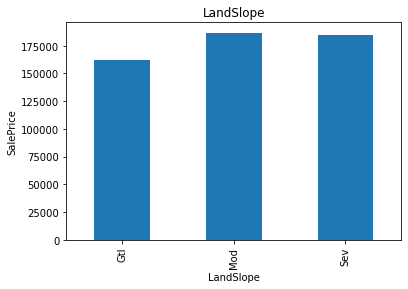

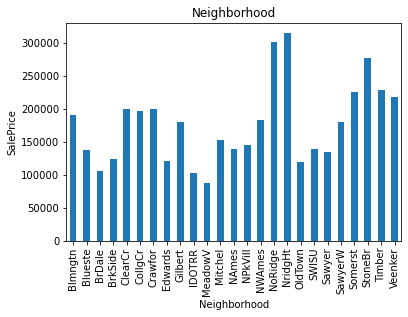

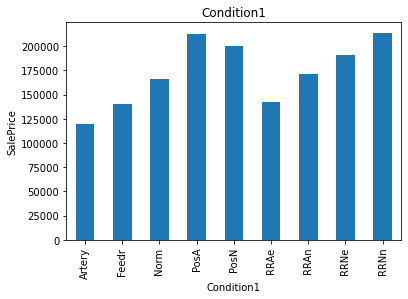

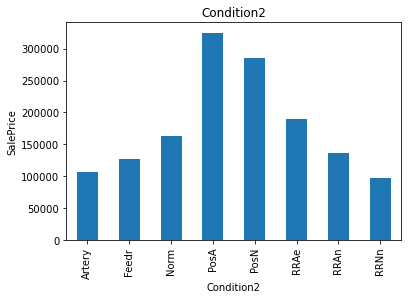

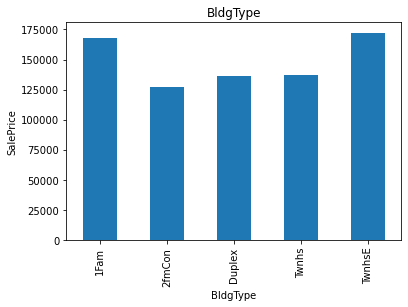

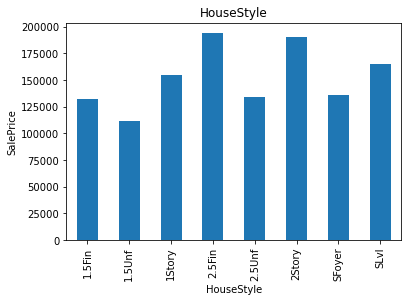

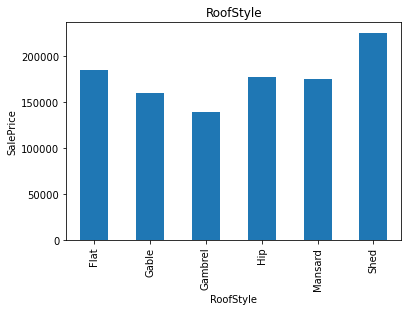

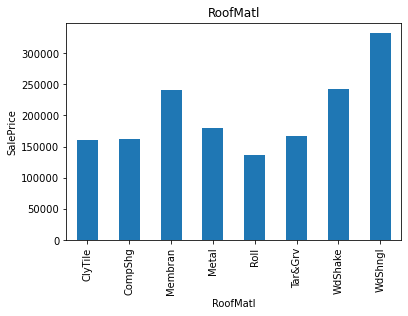

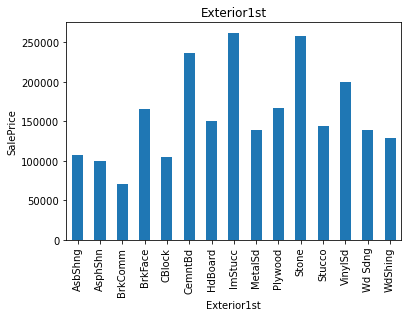

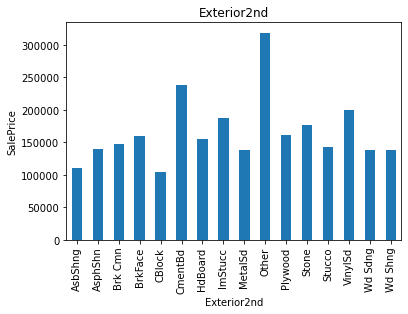

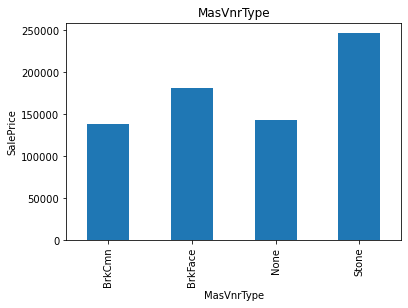

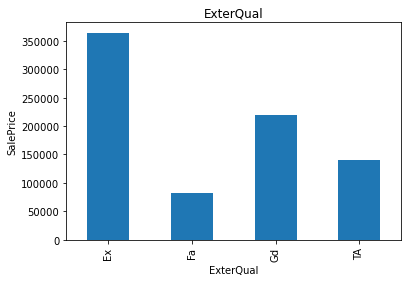

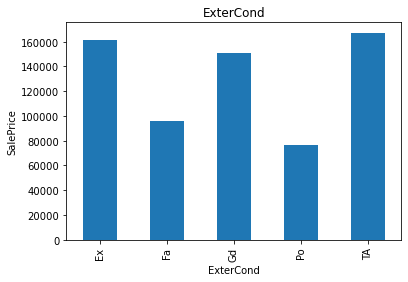

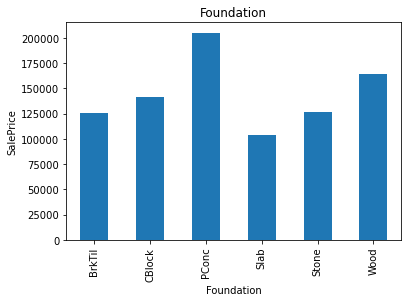

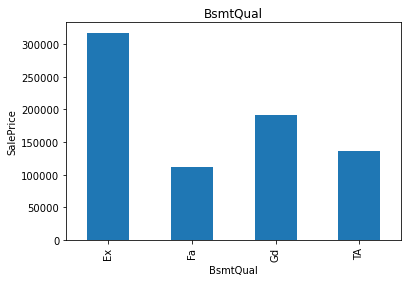

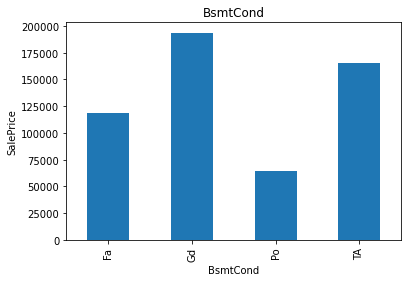

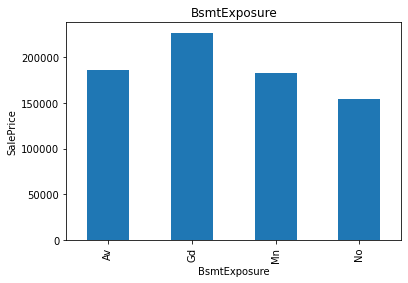

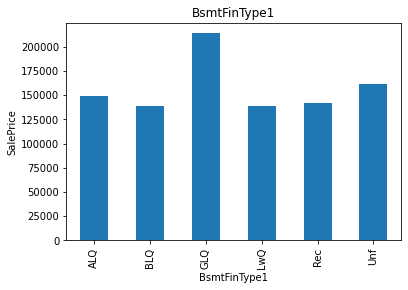

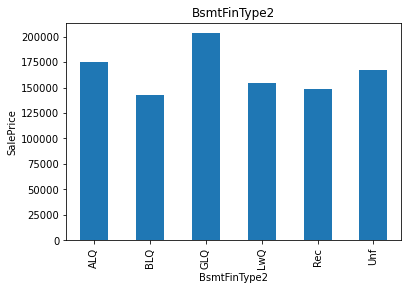

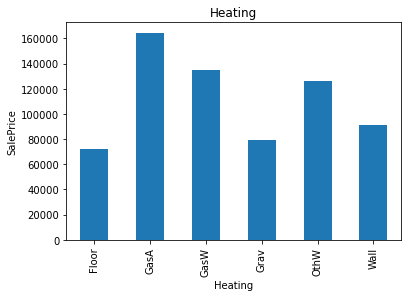

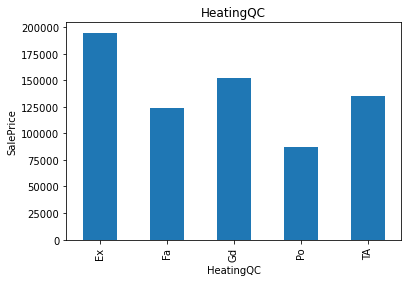

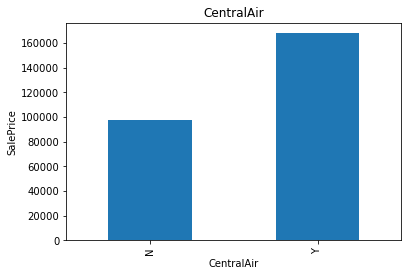

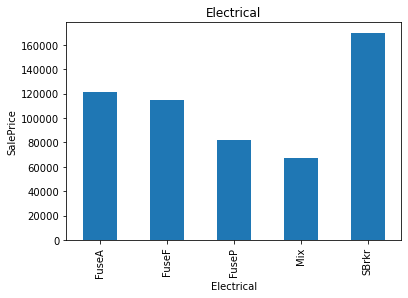

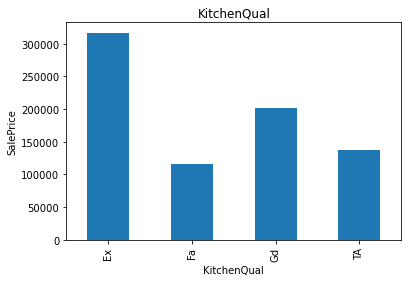

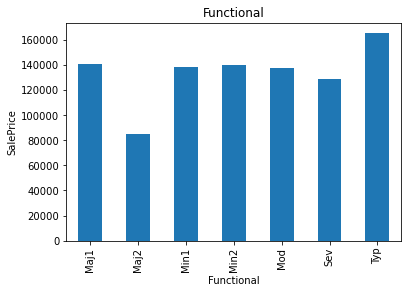

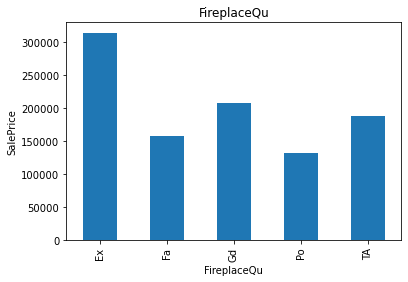

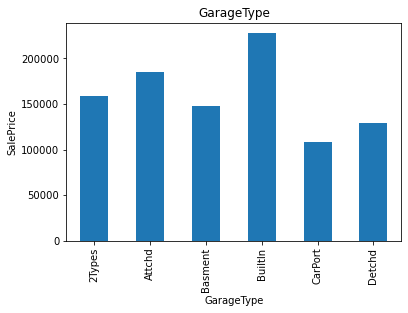

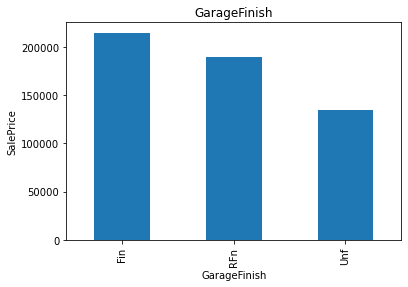

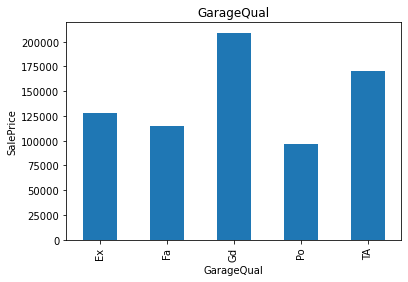

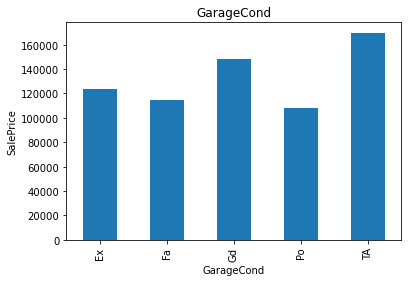

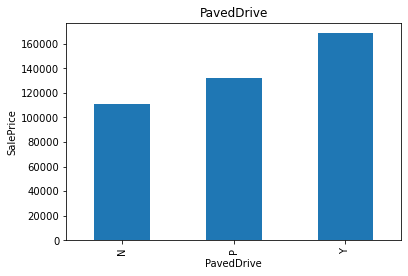

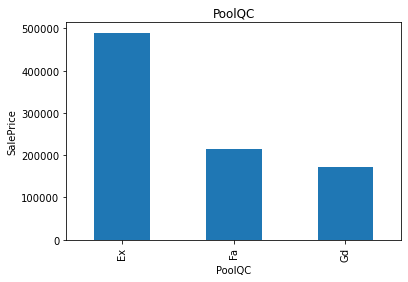

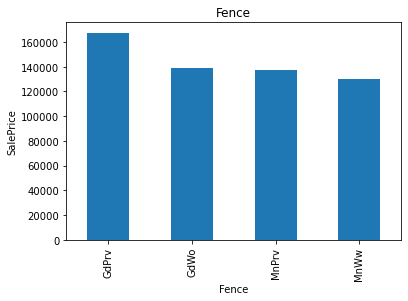

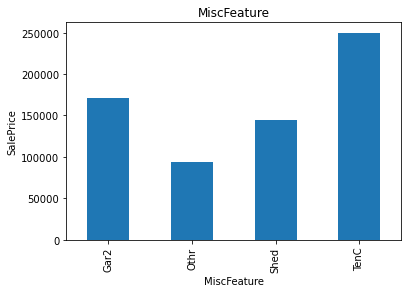

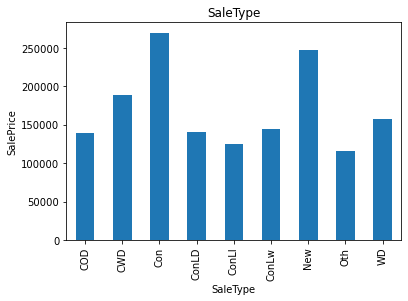

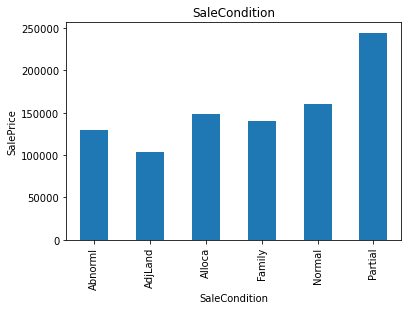

In [156]:
# Plotting between categorical features and SalePrice
for feature in categorical_features:
    data = df.copy()
    data.groupby(feature)["SalePrice"].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.title(feature)
    plt.show();

In [157]:
# Checking the dtype of missing values 
df[feature_with_na].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   Alley         91 non-null     object 
 2   MasVnrType    1452 non-null   object 
 3   MasVnrArea    1452 non-null   float64
 4   BsmtQual      1423 non-null   object 
 5   BsmtCond      1423 non-null   object 
 6   BsmtExposure  1422 non-null   object 
 7   BsmtFinType1  1423 non-null   object 
 8   BsmtFinType2  1422 non-null   object 
 9   Electrical    1459 non-null   object 
 10  FireplaceQu   770 non-null    object 
 11  GarageType    1379 non-null   object 
 12  GarageYrBlt   1379 non-null   float64
 13  GarageFinish  1379 non-null   object 
 14  GarageQual    1379 non-null   object 
 15  GarageCond    1379 non-null   object 
 16  PoolQC        7 non-null      object 
 17  Fence         281 non-null    object 
 18  MiscFeature   54 non-null   

### Feature Emgineering 

###### Removing the missing data

In [158]:
# Copying the dataset
data = df.copy()

# Removing the numerical missing values
for feature in feature_with_na:
    if pd.api.types.is_numeric_dtype(df[feature]):
        # Adding a binary feature that informs whether the data was missing or not
        data[feature+"_missing"] = pd.isnull(df[feature])
        # Filling the missing numeric data
        data[feature] = data[feature].fillna(data[feature].median())
        
data[feature_with_na].isna().sum()

LotFrontage        0
Alley           1369
MasVnrType         8
MasVnrArea         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt        0
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [159]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_missing,MasVnrArea_missing,GarageYrBlt_missing
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,False,False,False
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,False,False,False
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,False,False,False
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,False,False,False
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,False,False,False


In [160]:
# Converting the string data into categorical datatype
for label, content in data.items():
    if pd.api.types.is_string_dtype(content):
        data[label] = content.astype("category").cat.as_ordered()

In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 84 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Id                   1460 non-null   int64   
 1   MSSubClass           1460 non-null   int64   
 2   MSZoning             1460 non-null   category
 3   LotFrontage          1460 non-null   float64 
 4   LotArea              1460 non-null   int64   
 5   Street               1460 non-null   category
 6   Alley                91 non-null     category
 7   LotShape             1460 non-null   category
 8   LandContour          1460 non-null   category
 9   Utilities            1460 non-null   category
 10  LotConfig            1460 non-null   category
 11  LandSlope            1460 non-null   category
 12  Neighborhood         1460 non-null   category
 13  Condition1           1460 non-null   category
 14  Condition2           1460 non-null   category
 15  BldgType             

In [162]:
# Filling the missing categorical values
for feature in data.columns:
    if not pd.api.types.is_numeric_dtype(data[feature]):
        # Adding the binary feature to inform whether the categorical data was missing or not
        data[feature+"_missing"] = pd.isnull(data[feature])
        # Turning the categorical data into numeric and adding 1 to it 
        data[feature] = pd.Categorical(data[feature]).codes + 1

data[feature_with_na].isna().sum()

LotFrontage     0
Alley           0
MasVnrType      0
MasVnrArea      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [163]:
data.isna().sum()

Id                       0
MSSubClass               0
MSZoning                 0
LotFrontage              0
LotArea                  0
                        ..
PoolQC_missing           0
Fence_missing            0
MiscFeature_missing      0
SaleType_missing         0
SaleCondition_missing    0
Length: 127, dtype: int64

In [164]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_missing,MasVnrArea_missing,GarageYrBlt_missing,MSZoning_missing,Street_missing,Alley_missing,LotShape_missing,LandContour_missing,Utilities_missing,LotConfig_missing,LandSlope_missing,Neighborhood_missing,Condition1_missing,Condition2_missing,BldgType_missing,HouseStyle_missing,RoofStyle_missing,RoofMatl_missing,Exterior1st_missing,Exterior2nd_missing,MasVnrType_missing,ExterQual_missing,ExterCond_missing,Foundation_missing,BsmtQual_missing,BsmtCond_missing,BsmtExposure_missing,BsmtFinType1_missing,BsmtFinType2_missing,Heating_missing,HeatingQC_missing,CentralAir_missing,Electrical_missing,KitchenQual_missing,Functional_missing,FireplaceQu_missing,GarageType_missing,GarageFinish_missing,GarageQual_missing,GarageCond_missing,PavedDrive_missing,PoolQC_missing,Fence_missing,MiscFeature_missing,SaleType_missing,SaleCondition_missing
0,1,60,4,65.0,8450,2,0,4,4,1,5,1,6,3,3,1,6,7,5,2003,2003,2,2,13,14,2,196.0,3,5,3,3,4,4,3,706,6,0,150,856,2,1,2,5,856,854,0,1710,1,0,2,1,3,1,3,8,7,0,0,2,2003.0,2,2,548,5,5,3,0,61,0,0,0,0,0,0,0,0,2,2008,9,5,208500,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,False,False
1,2,20,4,80.0,9600,2,0,4,4,1,3,1,25,2,3,1,3,6,8,1976,1976,2,2,9,9,3,0.0,4,5,2,3,4,2,1,978,6,0,284,1262,2,1,2,5,1262,0,0,1262,0,1,2,0,3,1,4,6,7,1,5,2,1976.0,2,2,460,5,5,3,298,0,0,0,0,0,0,0,0,0,5,2007,9,5,181500,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False
2,3,60,4,68.0,11250,2,0,1,4,1,5,1,6,3,3,1,6,7,5,2001,2002,2,2,13,14,2,162.0,3,5,3,3,4,3,3,486,6,0,434,920,2,1,2,5,920,866,0,1786,1,0,2,1,3,1,3,6,7,1,5,2,2001.0,2,2,608,5,5,3,0,42,0,0,0,0,0,0,0,0,9,2008,9,5,223500,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False
3,4,70,4,60.0,9550,2,0,1,4,1,1,1,7,3,3,1,6,7,5,1915,1970,2,2,14,16,3,0.0,4,5,1,4,2,4,1,216,6,0,540,756,2,3,2,5,961,756,0,1717,1,0,1,0,3,1,3,7,7,1,3,6,1998.0,3,3,642,5,5,3,0,35,272,0,0,0,0,0,0,0,2,2006,9,1,140000,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False
4,5,60,4,84.0,14260,2,0,1,4,1,3,1,16,3,3,1,6,8,5,2000,2000,2,2,13,14,2,350.0,3,5,3,3,4,1,3,655,6,0,490,1145,2,1,2,5,1145,1053,0,2198,1,0,2,1,4,1,3,9,7,1,5,2,2000.0,2,3,836,5,5,3,192,84,0,0,0,0,0,0,0,0,12,2008,9,5,250000,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 127 entries, Id to SaleCondition_missing
dtypes: bool(46), float64(3), int64(35), int8(43)
memory usage: 560.5 KB


#### Feature Scaling 


In [166]:
# Applying feature scaling to the dataset
scaling_features = [feature for feature in data.columns if feature not in ["Id", "SalePrice"]]
len(scaling_features)

125

In [167]:
# Importing the MinMaxScaler and training data on it
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data[scaling_features])

MinMaxScaler()

In [168]:
# Transforming the data
scaler.transform(data[scaling_features])

array([[0.23529412, 0.75      , 0.15068493, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.20205479, ..., 1.        , 0.        ,
        0.        ],
       [0.23529412, 0.75      , 0.1609589 , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.29411765, 0.75      , 0.15410959, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.1609589 , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.18493151, ..., 1.        , 0.        ,
        0.        ]])

In [169]:
# transform the train and test set, and add on the Id and SalePrice variables
dt = pd.concat([data['SalePrice'].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(data[scaling_features]), columns=scaling_features)],
                    axis=1)

In [170]:
dt.head()

,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_missing,MasVnrArea_missing,GarageYrBlt_missing,MSZoning_missing,Street_missing,Alley_missing,LotShape_missing,LandContour_missing,Utilities_missing,LotConfig_missing,LandSlope_missing,Neighborhood_missing,Condition1_missing,Condition2_missing,BldgType_missing,HouseStyle_missing,RoofStyle_missing,RoofMatl_missing,Exterior1st_missing,Exterior2nd_missing,MasVnrType_missing,ExterQual_missing,ExterCond_missing,Foundation_missing,BsmtQual_missing,BsmtCond_missing,BsmtExposure_missing,BsmtFinType1_missing,BsmtFinType2_missing,Heating_missing,HeatingQC_missing,CentralAir_missing,Electrical_missing,KitchenQual_missing,Functional_missing,FireplaceQu_missing,GarageType_missing,GarageFinish_missing,GarageQual_missing,GarageCond_missing,PavedDrive_missing,PoolQC_missing,Fence_missing,MiscFeature_missing,SaleType_missing,SaleCondition_missing
0,208500,0.235294,0.75,0.150685,0.033420,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.208333,0.250,0.285714,0.0,0.714286,0.666667,0.500,0.949275,0.883333,0.2,0.142857,0.857143,0.866667,0.50,0.12250,0.666667,1.0,0.4,0.75,1.0,1.00,0.500000,0.125089,1.0,0.0,0.064212,0.140098,0.2,0.0,1.0,1.0,0.119780,0.413559,0.0,0.259231,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.500000,1.0,0.000000,0.0,0.333333,0.936364,0.666667,0.50,0.386460,1.0,1.0,1.0,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.50,1.0,0.8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
1,181500,0.000000,0.75,0.202055,0.038795,1.0,0.0,1.0,1.0,0.0,0.5,0.0,1.000000,0.125,0.285714,0.0,0.285714,0.555556,0.875,0.753623,0.433333,0.2,0.142857,0.571429,0.533333,0.75,0.00000,1.000000,1.0,0.2,0.75,1.0,0.50,0.166667,0.173281,1.0,0.0,0.121575,0.206547,0.2,0.0,1.0,1.0,0.212942,0.000000,0.0,0.174830,0.000000,0.5,0.666667,0.0,0.375,0.333333,1.000000,0.333333,1.0,0.333333,1.0,0.333333,0.690909,0.666667,0.50,0.324401,1.0,1.0,1.0,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.363636,0.25,1.0,0.8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2,223500,0.235294,0.75,0.160959,0.046507,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.208333,0.250,0.285714,0.0,0.714286,0.666667,0.500,0.934783,0.866667,0.2,0.142857,0.857143,0.866667,0.50,0.10125,0.666667,1.0,0.4,0.75,1.0,0.75,0.500000,0.086109,1.0,0.0,0.185788,0.150573,0.2,0.0,1.0,1.0,0.134465,0.419370,0.0,0.273549,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,1.0,0.333333,0.918182,0.666667,0.50,0.428773,1.0,1.0,1.0,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.727273,0.50,1.0,0.8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
3,140000,0.294118,0.75,0.133562,0.038561,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.250000,0.250,0.285714,0.0,0.714286,0.666667,0.500,0.311594,0.333333,0.2,0.142857,0.928571,1.000000,0.75,0.00000,1.000000,1.0,0.0,1.00,0.5,

In [171]:
# Exproting the preprocessed dataset
# data.to_csv("ScaledDataset.csv", index=False)

In [172]:
# Getting rid of missing indicating features
final_features = [feature for feature in dt.columns if "_missing" not in feature]
len(final_features)
dt = dt[final_features]

In [173]:
# Getting the X and y dataset ready!
X = dt.drop(["SalePrice"], axis=1)
y = dt["SalePrice"]

# Importing the train_test_split
from sklearn.model_selection import train_test_split

# Getting the train and validation split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

#### Feature Selection

In [182]:
# Importing the feature selection tools
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# Selecting the right models
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=42))
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=42))

In [183]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [184]:
# Getting the selected features 
selected_features = X_train.columns[(feature_sel_model.get_support())]
selected_features

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [185]:
X_train = X_train[selected_features]

In [186]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
502,0.000000,0.75,0.167808,0.036785,1.0,0.0,1.0,1.000000,0.0,0.0,0.0,0.291667,0.125,0.285714,0.0,0.285714,0.444444,0.75,0.673913,0.250000,0.6,0.142857,0.571429,0.533333,0.75,0.0,1.000000,1.0,0.2,1.00,1.0,1.00,0.166667,0.123671,0.5,0.065129,0.179795,0.198691,0.2,0.00,1.0,1.0,0.201927,0.0,0.0,0.165787,0.333333,0.0,0.333333,0.0,0.250,0.333333,1.000000,0.333333,1.0,0.000000,0.0,1.000000,0.590909,1.000000,0.5,0.325106,0.4,0.4,1.0,0.000000,0.000000,0.333333,0.0,0.0,0.0,0.0,0.25,0.75,0.025806,0.272727,0.25,1.0,0.8
1307,0.000000,0.75,0.133562,0.031653,1.0,0.0,1.0,1.000000,0.0,1.0,0.0,0.208333,0.250,0.285714,0.0,0.285714,0.444444,0.50,0.884058,0.750000,0.2,0.142857,0.857143,0.866667,0.75,0.0,1.000000,0.5,0.4,0.75,0.5,1.00,0.166667,0.132176,1.0,0.000000,0.104452,0.162029,0.2,0.00,1.0,1.0,0.150528,0.0,0.0,0.123587,0.333333,0.0,0.333333,0.0,0.375,0.333333,1.000000,0.250000,1.0,0.000000,0.0,1.000000,0.909091,1.000000,0.5,0.338505,1.0,1.0,1.0,0.000000,0.117002,0.000000,0.0,0.0,0.0,0.0,0.00,0.00,0.000000,0.363636,0.75,1.0,0.8
123,0.588235,0.75,0.116438,0.030812,1.0,0.0,1.0,1.000000,0.0,1.0,0.0,0.833333,0.250,0.285714,1.0,0.285714,0.555556,0.50,0.876812,0.716667,0.2,0.142857,0.642857,0.666667,0.75,0.0,0.666667,1.0,0.4,0.75,1.0,1.00,0.500000,0.053154,1.0,0.000000,0.384846,0.196236,0.2,0.00,1.0,1.0,0.198486,0.0,0.0,0.162962,0.000000,0.0,0.666667,0.0,0.250,0.333333,0.666667,0.250000,1.0,0.000000,0.0,0.333333,0.845455,0.666667,0.5,0.373766,1.0,1.0,1.0,0.000000,0.115174,0.000000,0.0,0.0,0.0,0.0,0.00,0.00,0.000000,0.181818,0.50,1.0,0.8
1434,0.000000,0.75,0.202055,0.075253,1.0,0.0,1.0,0.666667,0.0,1.0,0.5,0.458333,0.250,0.285714,0.0,0.285714,0.444444,0.50,0.760870,0.450000,0.2,0.142857,0.214286,0.200000,0.75,0.0,1.000000,1.0,0.2,1.00,1.0,1.00,0.166667,0.165840,1.0,0.000000,0.081336,0.184288,0.2,0.25,1.0,1.0,0.181735,0.0,0.0,0.149209,0.333333,0.0,0.666667,0.0,0.375,0.333333,1.000000,0.250000,1.0,0.333333,0.6,0.333333,0.700000,0.666667,0.5,0.341326,1.0,1.0,0.5,0.344224,0.074954,0.000000,0.0,0.0,0.0,0.0,0.00,0.00,0.000000,0.363636,0.00,1.0,0.8
928,0.000000,0.75,0.164384,0.049256,1.0,0.0,1.0,1.000000,0.0,1.0,0.0,0.208333,0.250,0.285714,0.0,0.285714,0.777778,0.50,0.934783,0.850000,0.6,0.142857,0.857143,0.866667,0.75,0.0,0.666667,1.0,0.4,0.75,1.0,0.25,1.000000,0.000000,1.0,0.000000,0.750428,0.286907,0.2,0.00,1.0,1.0,0.333639,0.0,0.0,0.273926,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.000000,0.416667,1.0,0.333333,1.0,0.333333,0.918182,0.666667,0.5,0.368124,1.0,1.0,1.0,0.235706,0.276051,0.000000,0.0,0.0,0.0,0.0,0.00,0.00,0.000000,0.454545,0.75,1.0,0.8


### Model Training

In [201]:
# Importing some regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [202]:
# Creating the function to train and test model

def train_and_score(models, X_train, y_train, X_val, y_val):
    """
    Trains and scores the models present in the models dictionary
    """
    
    # Setting random seed 
    np.random.seed(42)
    
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_val, y_val)
    
    return model_scores

In [203]:
# Creating dictionary of models
models = {"Linear Regression": LinearRegression(),
          "Random Forest Regressor": RandomForestRegressor(),
          "Gradient Regressor": GradientBoostingRegressor()
         }

In [204]:
# Using train_and_score model to test models
model_scores = train_and_score(models, X_train, y_train, X_val, y_val)
model_scores

{'Linear Regression': 0.6608001355277778,
 'Random Forest Regressor': 0.8415970190899812,
 'Gradient Regressor': 0.8746968839734612}